# Union Find Method to Identify Critical Connections

Given an undirected Connected graph of V vertices and E edges. A critical connection is an edge that, if removed, will make some nodes unable to reach some other nodes, the task is to find all critical connections in the graph.

We will use the cycle detection property of union find to find the critical connection in a graph. You can read more about using union find to detect cycles [here](https://medium.com/stackademic/union-find-algorithm-ebf2908c1985).

## Algorithm

Step 1. First start we will start with a candidate set of edge which contains all the connections. And a set call slack edges(keep track of non-critical or redundant edges) which we will initialize as empty.

Step 2. Initialize the union find structure.

Step 3. We will loop through the slack edges, keep track of non-critical or redundant edges. This will add the edge edges to the graph.

Step 4. Then we will loop through the candidate edges, using the find operation in UnionFind to see if the candidate edge form a cycle. 
- If the edge forms a cycle: remove the edge from the candidate set and add it to the slack set
- If the edge don't form a cycle: keep track of non-critical or redundant edges to add the edge to the graph

Step 5. After iterating through the candidate edges,
- If there is a change in the size of the slack and candidate edges go back to Step 2
- If there is no chance in the size of the slack and candidate edges. Exit the loop, the set candidate edges are the critical connections.

Step 2

|Candidate Edges|Slack Edges|
|---|---|
|2,4||
|1,2||
|4,3||
|2,3||
|2,0||
|3,0||

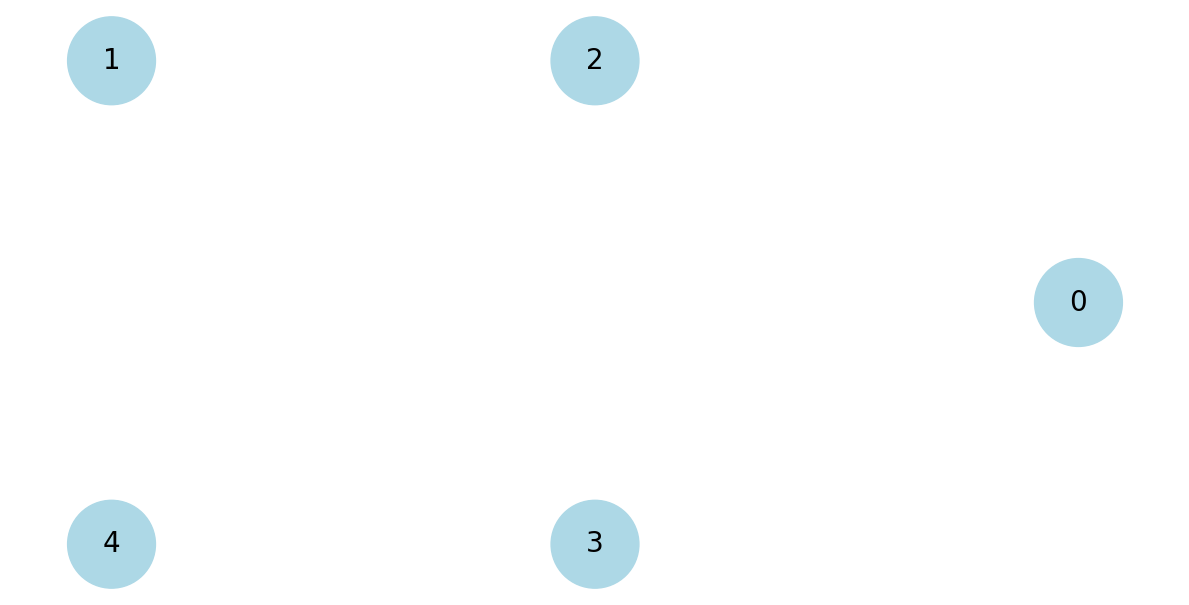

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="white")
Critical.add_edge(1, 2, color="white")
Critical.add_edge(4, 3, color="white")
Critical.add_edge(2, 3, color="white")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="white")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 3 Slack Edges is empty

Step 4 Iterating through Candidate Edges

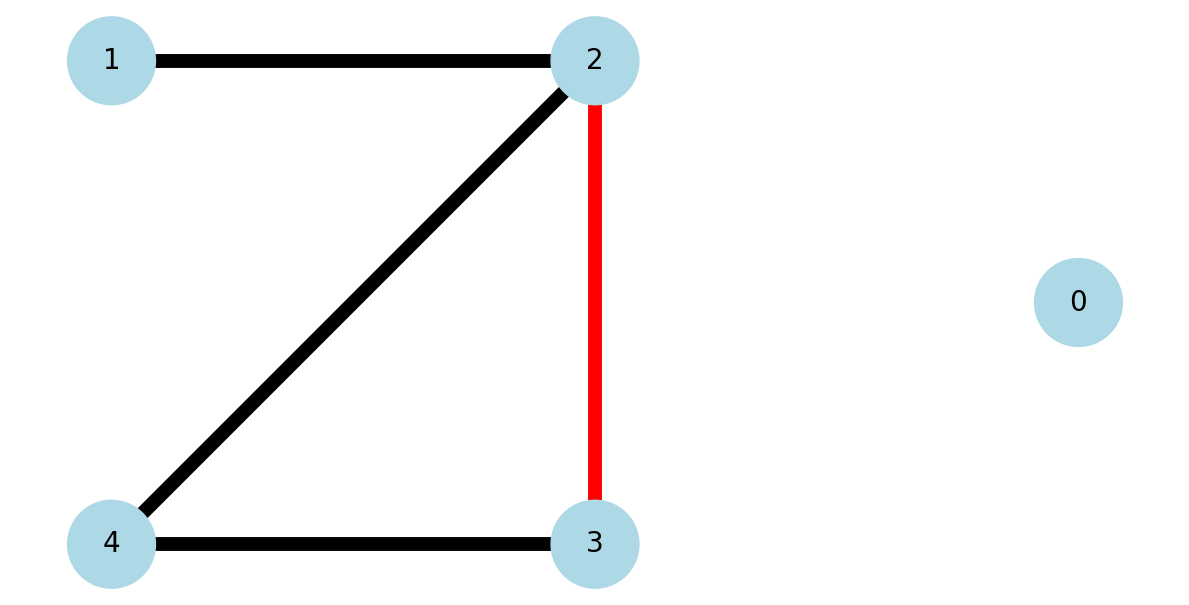

In [13]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="black")
Critical.add_edge(1, 2, color="black")
Critical.add_edge(4, 3, color="black")
Critical.add_edge(2, 3, color="red")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="white")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

||Candidate Edges|Slack Edges|
|-|---|---|
||2,4||
||1,2||
||4,3||
|--------->||2,3|
||2,0||
||3,0||

Since edge (2, 3) forms a cycle we move it from Candidate Edges to Slack Edges.

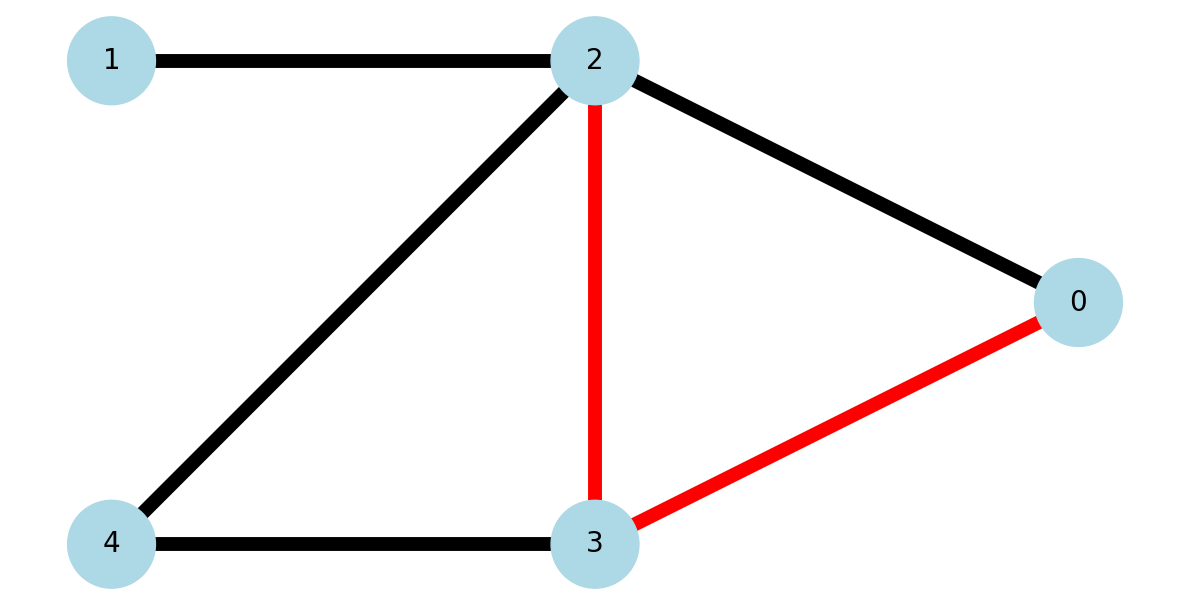

In [15]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="black")
Critical.add_edge(1, 2, color="black")
Critical.add_edge(4, 3, color="black")
Critical.add_edge(2, 3, color="red")
Critical.add_edge(2, 0, color="black")
Critical.add_edge(3, 0, color="red")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

||Candidate Edges|Slack Edges|
|-|---|---|
||2,4||
||1,2||
||4,3||
|||2,3|
||2,0||
|------->||3,0|

Since edge (3, 0) forms a cycle we move it from Candidate Edges to Slack Edges.

Step 5 Since there is a change in the Candadate and Slack Edges we move to step 2

Step 2
||Candidate Edges|Slack Edges|
|-|---|---|
||2,4||
||1,2||
||4,3||
|||2,3|
||2,0||
|||3,0|

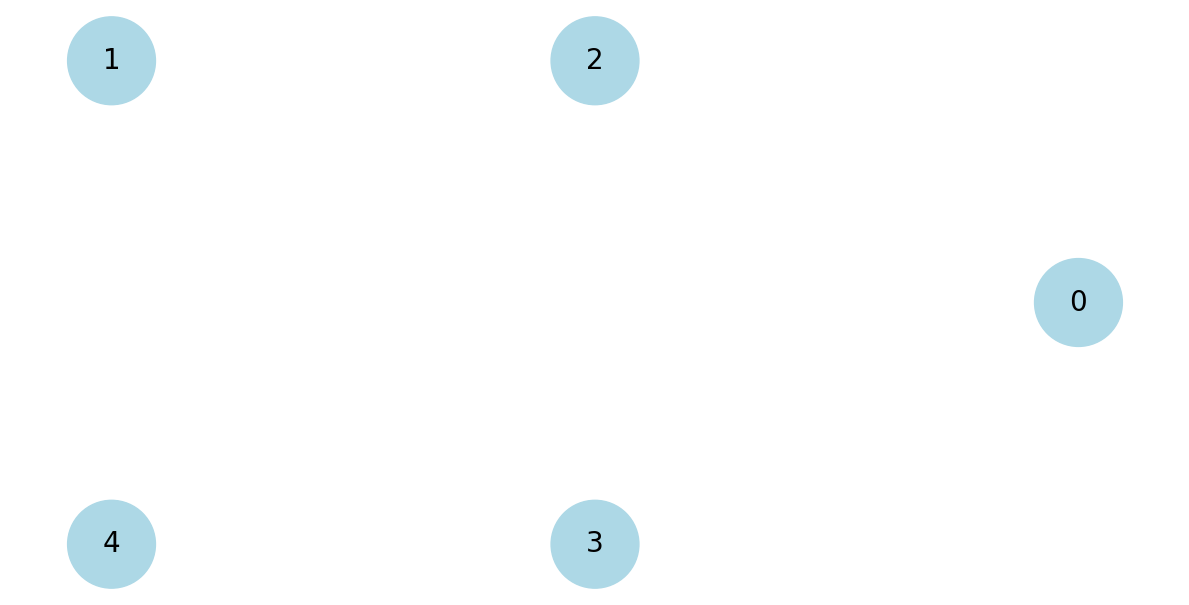

In [16]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="white")
Critical.add_edge(1, 2, color="white")
Critical.add_edge(4, 3, color="white")
Critical.add_edge(2, 3, color="white")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="white")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 3 Add the slack edges

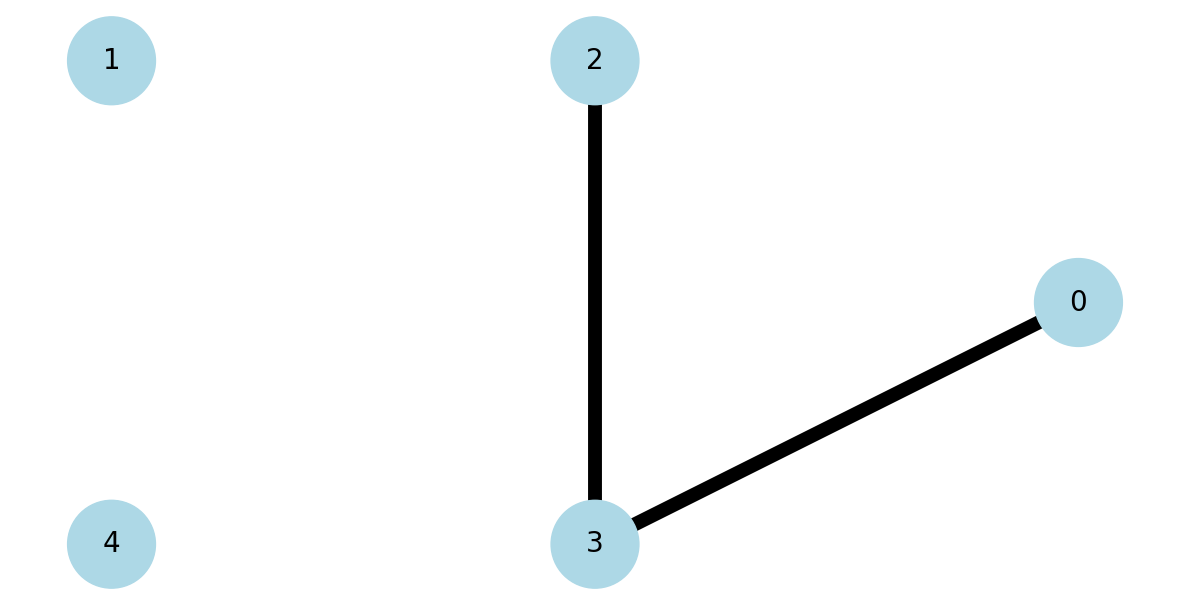

In [17]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="white")
Critical.add_edge(1, 2, color="white")
Critical.add_edge(4, 3, color="white")
Critical.add_edge(2, 3, color="black")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 4 Iterating through Candidate Edges

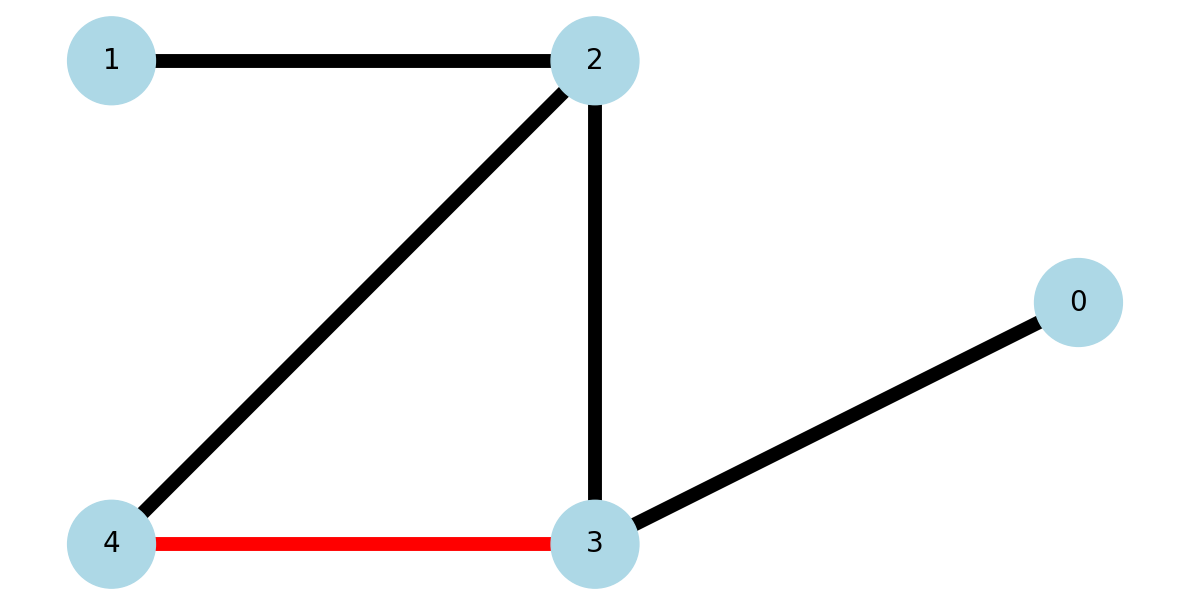

In [18]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="black")
Critical.add_edge(1, 2, color="black")
Critical.add_edge(4, 3, color="red")
Critical.add_edge(2, 3, color="black")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

||Candidate Edges|Slack Edges|
|-|---|---|
||2,4||
||1,2||
|------->||4,3|
|||2,3|
||2,0||
|||3,0|

Since edge (4, 3) forms a cycle we move it from Candidate Edges to Slack Edges.

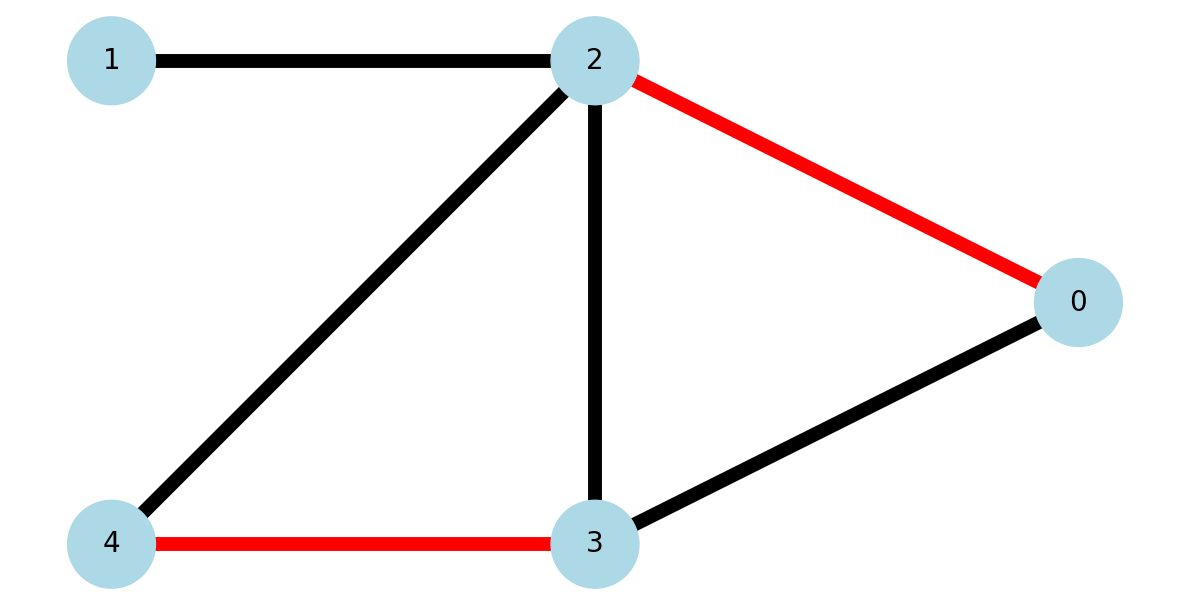

In [19]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="black")
Critical.add_edge(1, 2, color="black")
Critical.add_edge(4, 3, color="red")
Critical.add_edge(2, 3, color="black")
Critical.add_edge(2, 0, color="red")
Critical.add_edge(3, 0, color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

||Candidate Edges|Slack Edges|
|-|---|---|
||2,4||
||1,2||
|||4,3|
|||2,3|
|||2,0|
|||3,0|

Since edge (4, 3) forms a cycle we move it from Candidate Edges to Slack Edges.

Step 5 Since there is a change in the Candadate and Slack Edges we move to step 2

Step 2

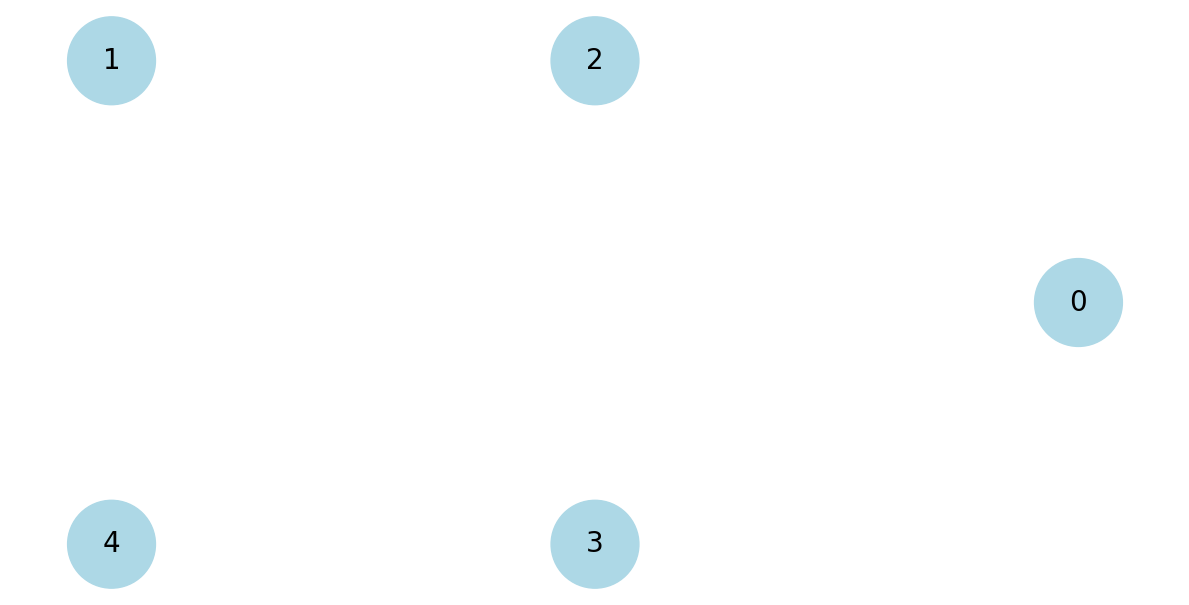

In [20]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="white")
Critical.add_edge(1, 2, color="white")
Critical.add_edge(4, 3, color="white")
Critical.add_edge(2, 3, color="white")
Critical.add_edge(2, 0, color="white")
Critical.add_edge(3, 0, color="white")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 3 add the slack edges

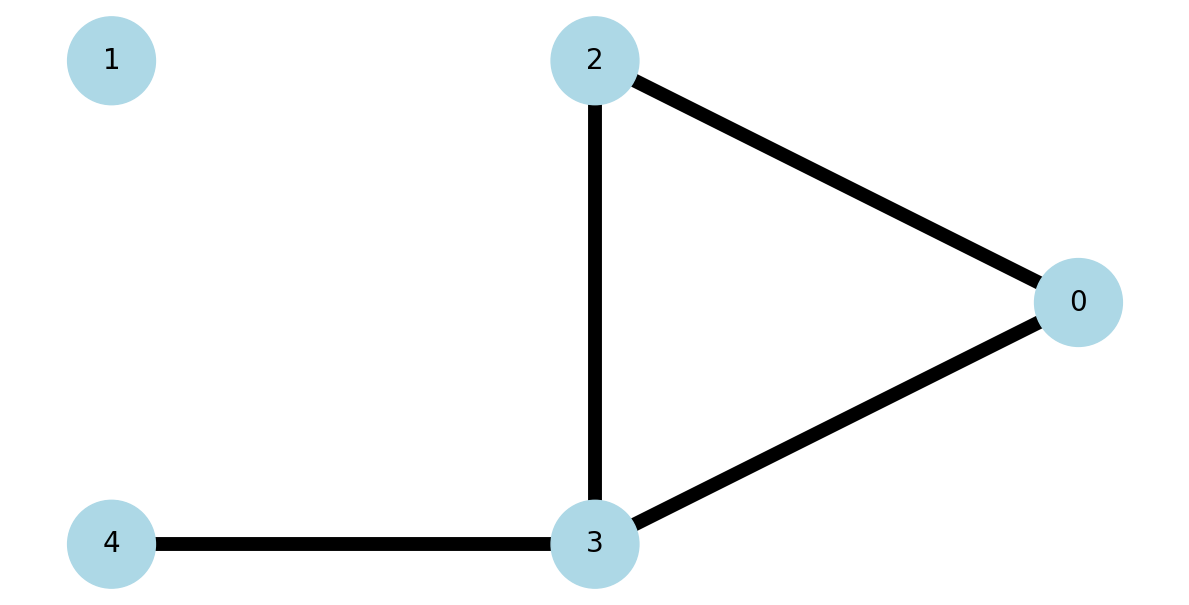

In [21]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="white")
Critical.add_edge(1, 2, color="white")
Critical.add_edge(4, 3, color="black")
Critical.add_edge(2, 3, color="black")
Critical.add_edge(2, 0, color="black")
Critical.add_edge(3, 0, color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

c
# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Step 4 Iterating through Candidate Edges

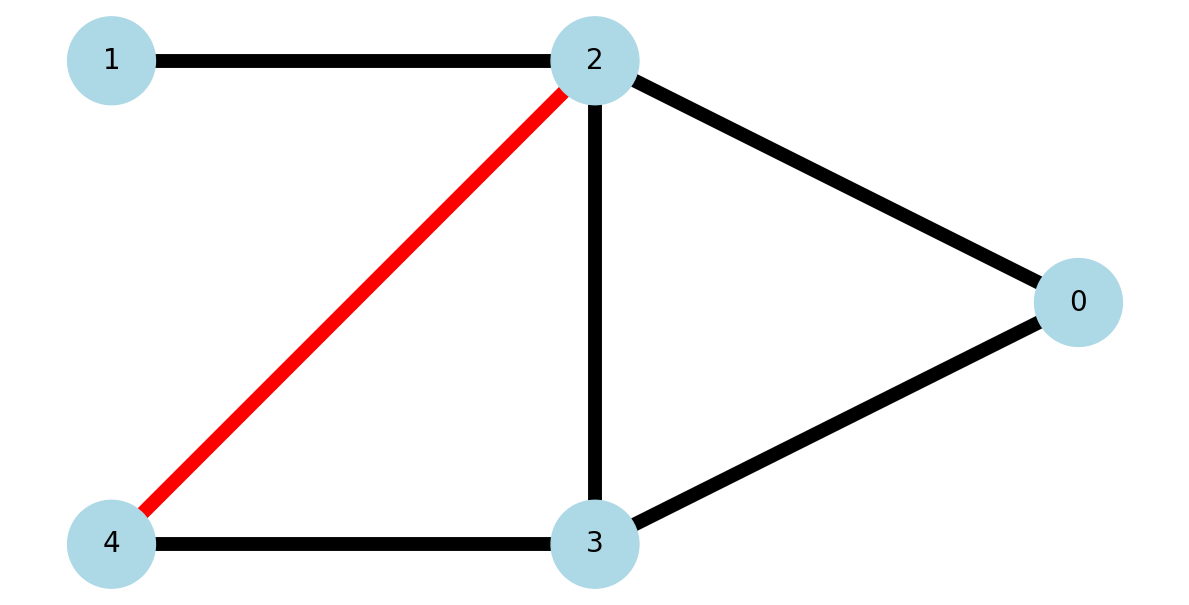

In [23]:
Critical = nx.Graph()
# Add nodes with color attributes
Critical.add_node(0, color='lightblue')
Critical.add_node(1, color='lightblue')
Critical.add_node(2, color='lightblue')
Critical.add_node(3, color='lightblue')
Critical.add_node(4, color='lightblue')

# Add edges with labels
Critical.add_edge(2, 4, color="red")
Critical.add_edge(1, 2, color="black")
Critical.add_edge(4, 3, color="black")
Critical.add_edge(2, 3, color="black")
Critical.add_edge(2, 0, color="black")
Critical.add_edge(3, 0, color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Critical.nodes[node]['color'] for node in Critical.nodes()]

# Draw edges with colors and width
edge_colors = [Critical.edges[edge]['color'] for edge in Critical.edges()]
edge_widths = [10 for edge in Critical.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Critical, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
# ax1.set_title("Critical's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Critical, 'label')
nx.draw_networkx_edges(Critical, pos, edgelist=Critical.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Critical, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

||Candidate Edges|Slack Edges|
|-|---|---|
|------->||2,4|
||1,2||
|||4,3|
|||2,3|
|||2,0|
|||3,0|

Since edge (2, 4) forms a cycle we move it from Candidate Edges to Slack Edges.

Step 5 There is a change in the number of Candidate and Slack edges, repeat step 2.

In the next iteration since edge 2,4 does not form a cycle our set of critical edge is (1,2)

In [ ]:
class Solution {
    public static class UnionFind {
        private int[] parent;
        private int[] rank;

        public UnionFind(int n) {
            parent = new int[n];
            rank = new int[n];
            for (int i = 0; i < n; i++) {
                parent[i] = i;
                rank[i] = 0;
            }
        }

        public int find(int node) {
            if (parent[node] != node) {
                parent[node] = find(parent[node]);  // Path compression
            }
            return parent[node];
        }

        public void union(int node1, int node2) {
            int root1 = find(node1);
            int root2 = find(node2);
            if (root1 != root2) {
                if (rank[root1] > rank[root2]) {
                    parent[root2] = root1;
                } else if (rank[root1] < rank[root2]) {
                    parent[root1] = root2;
                } else {
                    parent[root2] = root1;
                    rank[root1] += 1;
                }
            }
        }
    }

    public List<List<Integer>> criticalConnections(int n, List<List<Integer>> connections) {
        Set<Integer> nodes = new HashSet<>();
        Set<List<Integer>> candidateSet = new HashSet<>();
        Set<List<Integer>> slackEdges = new HashSet<>();
        for (List<Integer> connection: connections) {
            nodes.add(connection.get(0));
            nodes.add(connection.get(1));
            candidateSet.add(connection);
        }

        int candidateSize = 0;
        
        
        while (candidateSize != candidateSet.size()) {
            UnionFind uf = new UnionFind(n);
            candidateSize = candidateSet.size();

            for (List<Integer> slackEdge: slackEdges) {
                Integer nodeI = slackEdge.get(0);
                Integer nodeJ = slackEdge.get(1);
                uf.union(nodeI, nodeJ);
            }

            Iterator<List<Integer>> iterator = candidateSet.iterator();
            while (iterator.hasNext()) {
                List<Integer> candidateEdge = iterator.next();
                Integer nodeI = candidateEdge.get(0);
                Integer nodeJ = candidateEdge.get(1);

                if (uf.find(nodeI) == uf.find(nodeJ)) {
                    slackEdges.add(candidateEdge);
                    iterator.remove(); 
                } else {
                    uf.union(nodeI, nodeJ);
                }
            }
        }

  
        List<List<Integer>> result = new ArrayList<>();
        for (List<Integer> edge: candidateSet) {
            result.add(edge);
        }
        return result;
    }
}